In [3]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline

In [4]:
iris = datasets.load_iris()

In [4]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n    

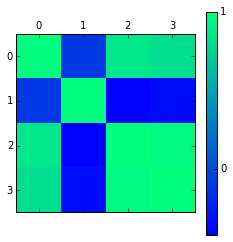

In [76]:
X = iris.data
y = iris.target
covdata= np.corrcoef(X.T)

img = plt.matshow(covdata, cmap=plt.cm.winter)
plt.colorbar(img, ticks=[-1,0,1])

target_names = ["setosa", "verica"]
X = X[y!=2 , :]
y = y[y != 2]



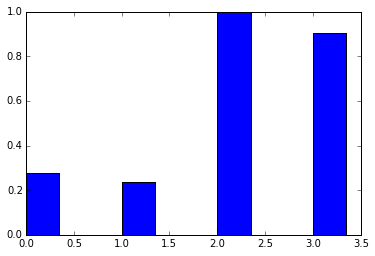

In [84]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = map(lambda x: -np.log10(x) if x>0 else 0, selector.pvalues_)
scores /= max(scores)
ind =np.arange(4)
plt.bar(ind,scores, 0.35, color="blue")

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

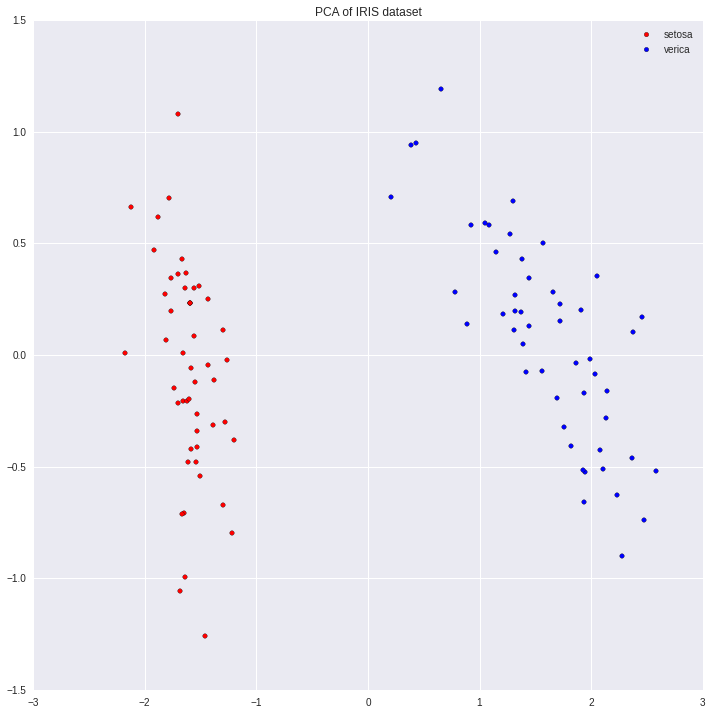

In [36]:
plt.figure(figsize=(12,12))
for c, i, target_name in zip("rb", [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

In [8]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.90505321  0.07466183]


In [7]:
from sklearn import svm

In [18]:
C=1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_r, y)

In [24]:
h=0.02
x_min, x_max = X_r[:, 0].min() - 1, X_r[:, 0].max() + 1
y_min, y_max = X_r[:, 1].min() - 1, X_r[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [25]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

([], <a list of 0 Text yticklabel objects>)

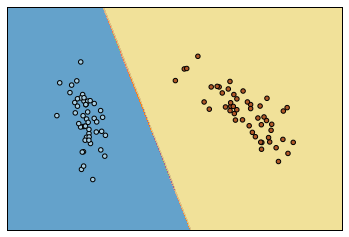

In [39]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [67]:
svc.decision_function

<bound method SVC.decision_function of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)>

In [36]:
print svc.coef_

[[ 1.14851302  0.45529241]]


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
plot_step =0.02
n_classes=2
plot_colors = "rb"

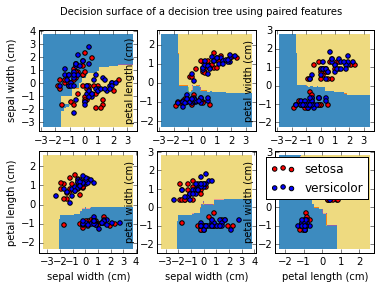

In [88]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    Xa = X[:, pair]
    ya = y

    # Shuffle
    idx = np.arange(Xa.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    Xa = Xa[idx]
    ya = ya[idx]

    # Standardize
    mean = Xa.mean(axis=0)
    std = Xa.std(axis=0)
    Xa = (Xa - mean) / std

    # Train
    clf = ExtraTreesClassifier(max_depth=10).fit(Xa, ya)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = Xa[:, 0].min() - 1, Xa[:, 0].max() + 1
    y_min, y_max = Xa[:, 1].min() - 1, Xa[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(Xa[idx, 0], Xa[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
